17.5 Log-optimal investment strategy

In [1]:
import numpy as np
import cvxpy as cp
from matplotlib import pyplot as plt

In [2]:
P = np.array([[3.5000, 1.1100, 1.1100, 1.0400, 1.0100],
              [0.5000, 0.9700, 0.9800, 1.0500, 1.0100],
              [0.5000, 0.9900, 0.9900, 0.9900, 1.0100],
              [0.5000, 1.0500, 1.0600, 0.9900, 1.0100],
              [0.5000, 1.1600, 0.9900, 1.0700, 1.0100],
              [0.5000, 0.9900, 0.9900, 1.0600, 1.0100],
              [0.5000, 0.9200, 1.0800, 0.9900, 1.0100],
              [0.5000, 1.1300, 1.1000, 0.9900, 1.0100],
              [0.5000, 0.9300, 0.9500, 1.0400, 1.0100],
              [3.5000, 0.9900, 0.9700, 0.9800, 1.0100]])

m, n = P.shape
Pi = np.ones((m, 1)) / m
x_unif = np.ones((n, 1)) / n

In [18]:
x = cp.Variable(n, nonneg=True)
objective = cp.Maximize(Pi.T @ cp.log(P @ x))
constraints = [cp.sum(x) == 1]
prob = cp.Problem(objective, constraints)
result = prob.solve()
x_opt = x.value
print('log-optimal investment strategy:', ["{:.6f}".format(i) for i in x_opt])
print('optimal:', objective.value)
print('uniform:', (Pi.T @ np.log(P @ x_unif))[0,0])
for j in range(n):
    print(f'pure investment in asset {j}:', (Pi.T @ np.log(P[:,j]))[0])

log-optimal investment strategy: ['0.057974', '0.399983', '0.292272', '0.249771', '0.000000']
optimal: 0.02307832087659323
uniform: 0.011370774818391978
pure investment in asset 0: -0.3039651507488826
pure investment in asset 1: 0.020722530051709796
pure investment in asset 2: 0.020279392763838902
pure investment in asset 3: 0.019275509634226015
pure investment in asset 4: 0.00995033085316809


In [40]:
# generate random event sequences
T = 200
num_path = 10 # number of sample trajectories
opt_wealth = np.zeros((num_path, T+1))
unif_wealth = np.zeros((num_path, T+1))
opt_wealth[:,0] = 1
unif_wealth[:,0] = 1 
for i in range(num_path):
    event_seq = np.random.choice(np.arange(m), size=T, p=Pi.flatten())
    for t in range(T):
        opt_wealth[i,t+1] = opt_wealth[i,t] * x_opt.T @ P[event_seq[t]]
        unif_wealth[i,t+1] = unif_wealth[i,t] * x_unif.T @ P[event_seq[t]]

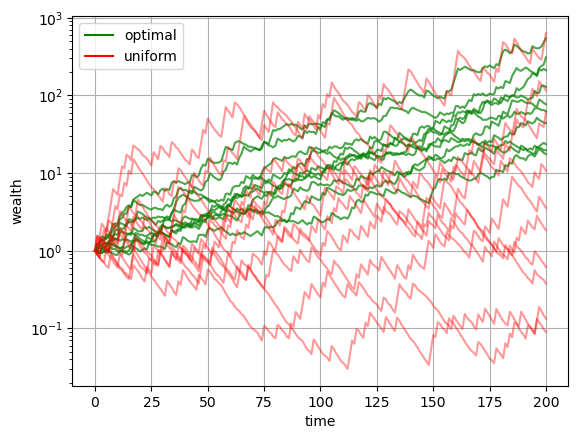

In [52]:
plt.figure()
plt.plot([], [], 'g', label='optimal')  # Dummy plot for the legend label
plt.plot([], [], 'r', label='uniform')  # Dummy plot for the legend label
plt.semilogy(opt_wealth.T, 'g', alpha=0.7)
plt.semilogy(unif_wealth.T, 'r', alpha=0.4)
plt.grid(True)
plt.axis('tight')
plt.xlabel('time')
plt.ylabel('wealth')
plt.legend()
plt.show()